In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df =pd.read_csv("data\kidney_disease.csv")

In [3]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [4]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [5]:
df.duplicated().sum()

0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [5]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


## Chronic Kidney Disease (CKD) Data Preparation Project

**Project Goal** 

The primary objective of this project is to thoroughly clean, preprocess, and prepare a raw dataset on Chronic Kidney Disease (CKD) for machine learning. The final output will be a clean, well-structured dataset that is ready to be used for training a predictive model. This project focuses exclusively on the crucial initial stages of the data analysis workflow.

**About the Dataset**

This dataset contains 400 records and 26 features, collected from patients to identify factors related to Chronic Kidney Disease. Each row represents a single patient, and the columns contain a mix of numerical and categorical health indicators.


**Target Variable:**

Classification: This is the crucial column that a future model would aim to predict. It indicates whether a patient is classified as having 'ckd' (Chronic Kidney Disease) or 'notckd' (Not Chronic Kidney Disease).

My approach is to review each feature individually and complete all necessary tasks within that column. 

In [6]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [7]:
# ID: This column contains unique identifiers for each patient. It is not necessary for model training, so it can be dropped.
df.drop(columns=['id'], inplace=True)

In [8]:
# Age: This column contains the age of the patients. It is a numerical feature that can be used in model training.
# It is important to check for any missing values or outliers in this column.

df['age'].unique()


array([48.,  7., 62., 51., 60., 68., 24., 52., 53., 50., 63., 40., 47.,
       61., 21., 42., 75., 69., nan, 73., 70., 65., 76., 72., 82., 46.,
       45., 35., 54., 11., 59., 67., 15., 55., 44., 26., 64., 56.,  5.,
       74., 38., 58., 71., 34., 17., 12., 43., 41., 57.,  8., 39., 66.,
       81., 14., 27., 83., 30.,  4.,  3.,  6., 32., 80., 49., 90., 78.,
       19.,  2., 33., 36., 37., 23., 25., 20., 29., 28., 22., 79.])

In [10]:
df['age'].dtype

dtype('float64')

In [11]:
df['age'].isnull().sum()

9

In [12]:
# We will fill missing values in the 'age' column with the median age of the patients.

df['age'].fillna(df['age'].median(), inplace=True)

In [13]:
df['age'].isnull().sum()

0

In [14]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [16]:
# Blood Pressure: This column contains the blood pressure readings of the patients. It is a numerical feature that can be used in model training.

df['bp'].dtype

dtype('float64')

In [17]:
df['bp'].isnull().sum()

12

In [18]:
# Replace missing values in 'bp' with the median blood pressure reading.
df['bp'].fillna(df['bp'].median(), inplace=True)

In [19]:
df['bp'].isnull().sum()

0

In [20]:
df['bp'].describe()

count    400.000000
mean      76.575000
std       13.489785
min       50.000000
25%       70.000000
50%       80.000000
75%       80.000000
max      180.000000
Name: bp, dtype: float64

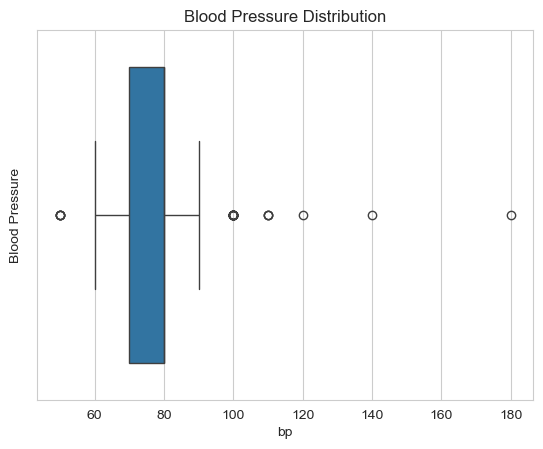

In [23]:
sns.set_style("whitegrid")
sns.boxplot(x=df['bp'])
plt.title('Blood Pressure Distribution')
plt.ylabel('Blood Pressure')
plt.show()

In [24]:
# Outliers handling for 'bp' Column using Capping Method 

q1 = df['bp'].quantile(0.25)
q3 = df['bp'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr


df['bp'] = np.where(df['bp'] < lower_bound, lower_bound,np.where(df['bp'] > upper_bound, upper_bound, df['bp']))

In [30]:
lower_bound, upper_bound

(55.0, 95.0)

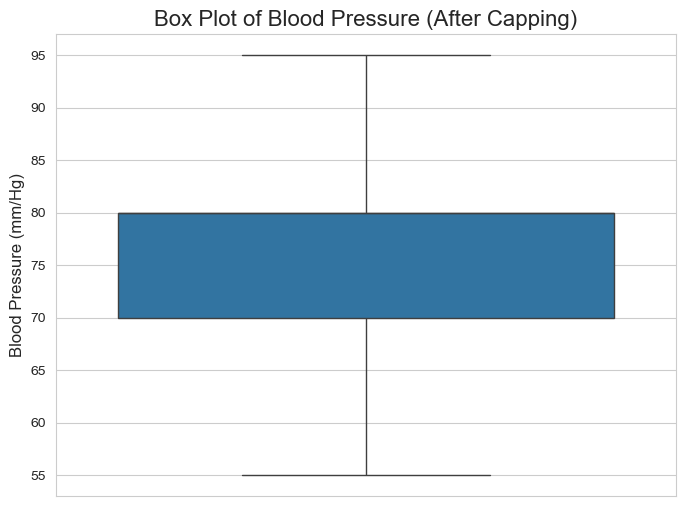

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['bp'])
plt.title('Box Plot of Blood Pressure (After Capping)', fontsize=16)
plt.ylabel('Blood Pressure (mm/Hg)', fontsize=12)
plt.show()

In [31]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [32]:
# Specific Gravity: This column contains the specific gravity readings of the patients. It is a numerical feature that can be used in model training.
df['sg'].dtype

dtype('float64')

In [33]:
df['sg'].isnull().sum()

47

In [34]:
# Replace missing values in 'sg' with the median blood pressure reading.

df['sg'].fillna(df['sg'].median(), inplace=True)

In [35]:
df['sg'].isnull().sum()


0

In [38]:
df['sg'].describe()

count    400.000000
mean       1.017712
std        0.005434
min        1.005000
25%        1.015000
50%        1.020000
75%        1.020000
max        1.025000
Name: sg, dtype: float64

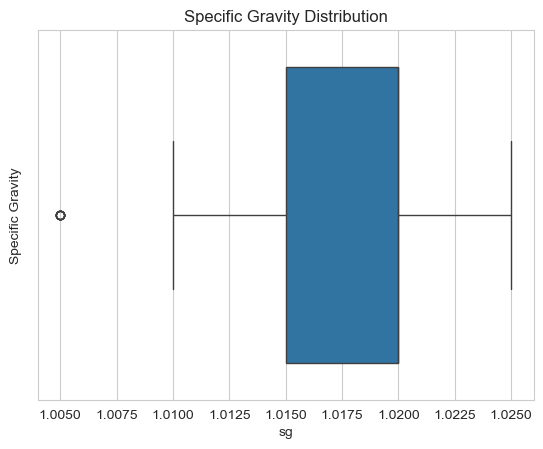

In [36]:
# Check outliers in 'sg' column

sns.set_style("whitegrid")
sns.boxplot(x=df['sg'])
plt.title('Specific Gravity Distribution')
plt.ylabel('Specific Gravity')
plt.show()

In [39]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [41]:
# Albumin: This column contains the albumin levels of the patients. It is a numerical feature that can be used in model training.
df['al'].dtype

dtype('float64')

In [43]:
df['al'].unique()

array([ 1.,  4.,  2.,  3.,  0., nan,  5.])

In [42]:
df['al'].isnull().sum()

46

In [47]:
df['al'].value_counts()

al
0.0    245
1.0     44
2.0     43
3.0     43
4.0     24
5.0      1
Name: count, dtype: int64

In [44]:
# Replace missing values in 'al' with the mode of albumin levels.
df['al'].fillna(df['al'].mode()[0], inplace=True)

In [50]:
df['al'].isnull().sum()

0

In [49]:
df['al'].describe()

count    400.00000
mean       0.90000
std        1.31313
min        0.00000
25%        0.00000
50%        0.00000
75%        2.00000
max        5.00000
Name: al, dtype: float64

In [51]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [52]:
# Sugar: This column contains the sugar levels of the patients. It is a numerical feature that can be used in model training.
df['su'].dtype

dtype('float64')

In [53]:
df['su'].unique()

array([ 0.,  3.,  4.,  1., nan,  2.,  5.])

In [54]:
df['su'].isnull().sum()

49

In [58]:
df['su'].value_counts()

su
0.0    290
2.0     18
3.0     14
4.0     13
1.0     13
5.0      3
Name: count, dtype: int64

In [56]:
df['su'].mode()

0    0.0
Name: su, dtype: float64

In [59]:
# Replace missing values in 'su' with the mode of sugar levels.
df['su'].fillna(df['su'].mode()[0], inplace=True)

In [60]:
df['su'].describe()

count    400.000000
mean       0.395000
std        1.040038
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        5.000000
Name: su, dtype: float64

In [61]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [64]:
# Red Blood Cells: This column indicates the presence of red blood cells in the urine. It is a categorical feature that can be used in model training.

df['rbc'].dtype

dtype('O')

In [65]:
df['rbc'].unique()

array([nan, 'normal', 'abnormal'], dtype=object)

In [66]:
df['rbc'].isnull().sum()

152

In [68]:
df['rbc'].value_counts()


rbc
normal      353
abnormal     47
Name: count, dtype: int64

In [67]:
# Replace missing values in'rbc' with the mode of red blood cells.
df['rbc'].fillna(df['rbc'].mode()[0], inplace=True)

In [69]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [70]:
# Pus cell: This column indicates the presence of pus cells in the urine. It is a categorical feature that can be used in model training.
df['pc'].dtype

dtype('O')

In [71]:
df['pc'].unique()

array(['normal', 'abnormal', nan], dtype=object)

In [72]:
df['pc'].isnull().sum()

65

In [75]:
df['pc'].value_counts()

pc
normal      324
abnormal     76
Name: count, dtype: int64

In [73]:
# Replce missing values in 'pc' with the mode of pus cells.
df['pc'].fillna(df['pc'].mode()[0], inplace=True)

In [76]:
df['pc'].isnull().sum()

0

In [77]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [78]:
# Pus cell clumps: This column indicates the presence of pus cell clumps in the urine. It is a categorical feature that can be used in model training.
df['pcc'].dtype

dtype('O')

In [79]:
df['pcc'].unique()

array(['notpresent', 'present', nan], dtype=object)

In [81]:
df['pcc'].value_counts()

pcc
notpresent    358
present        42
Name: count, dtype: int64

In [80]:
#Replce missing values in 'pcc' with the mode of pus cell clumps.
df['pcc'].fillna(df['pcc'].mode()[0], inplace=True)

In [82]:
df['pcc'].isnull().sum()

0

In [83]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [84]:
# Bacteria: This column indicates the presence of bacteria in the urine. It is a categorical feature that can be used in model training.
df['ba'].dtype

dtype('O')

In [85]:
df['ba'].unique()

array(['notpresent', 'present', nan], dtype=object)

In [86]:
df['ba'].value_counts()

ba
notpresent    374
present        22
Name: count, dtype: int64

In [87]:
# Replce missing values in 'ba' with the mode of bacteria.
df['ba'].fillna(df['ba'].mode()[0], inplace=True)

In [88]:
df['ba'].isnull().sum()

0

In [89]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [90]:
# Blood Glucose random: This column contains the random blood glucose levels of the patients. It is a numerical feature that can be used in model training.
df['bgr'].dtype

dtype('float64')

In [91]:
df['bgr'].isnull().sum()

44

In [92]:
# Replace missing values in 'bgr' with the median blood glucose reading.
df['bgr'].fillna(df['bgr'].median(), inplace=True)

In [93]:
df['bgr'].isnull().sum()

0

In [94]:
df['bgr'].describe()

count    400.000000
mean     145.062500
std       75.260774
min       22.000000
25%      101.000000
50%      121.000000
75%      150.000000
max      490.000000
Name: bgr, dtype: float64

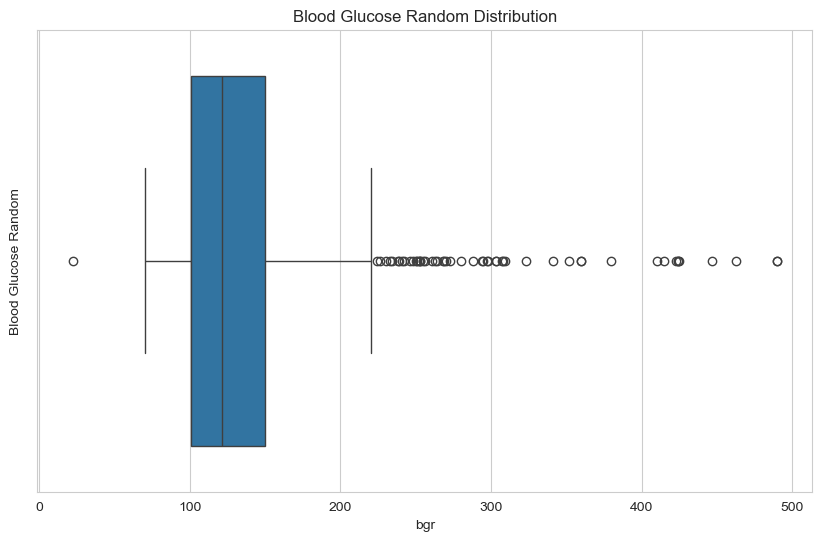

In [95]:
# Check outliers in 'bgr' column

sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.boxplot(x=df['bgr'])
plt.title('Blood Glucose Random Distribution')
plt.ylabel('Blood Glucose Random')
plt.show()

These outliers represent patients with very high blood glucose levels (from ~200 up to nearly 500 mg/dl). In a medical context, these are not likely data entry errors. Instead, they are clinically significant values, indicating patients with hyperglycemia, a hallmark of diabetes. Diabetes is a leading cause of Chronic Kidney Disease.We will not perform any outlier handling. We will keep these high values as they are.

In [96]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [97]:
# Blood Urea: This column contains the blood urea levels of the patients. It is a numerical feature that can be used in model training.
df['bu'].dtype

dtype('float64')

In [98]:
df['bu'].isnull().sum()

19

In [99]:
# Replace missing values in 'bu' with the median blood Urea  reading.
df['bu'].fillna(df['bu'].median(), inplace=True)
df['bu'].isnull().sum()

0

In [100]:
df['bu'].describe()

count    400.000000
mean      56.693000
std       49.395258
min        1.500000
25%       27.000000
50%       42.000000
75%       61.750000
max      391.000000
Name: bu, dtype: float64

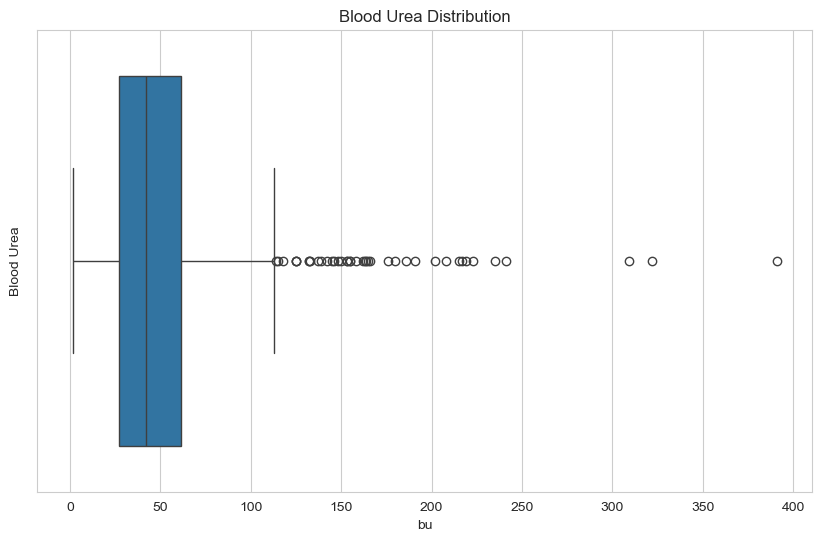

In [102]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.boxplot(x=df['bu'])
plt.title('Blood Urea Distribution')
plt.ylabel('Blood Urea')
plt.show()

Just like with blood glucose (bgr), these outliers are not noise. They are the most important data points in this column for predicting Chronic Kidney Disease.We will not perform any outlier handling on this column.

In [103]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [104]:
# Serum Creatinine: This column contains the serum creatinine levels of the patients. It is a numerical feature that can be used in model training.
df['sc'].dtype

dtype('float64')

In [105]:
df['sc'].isnull().sum()

17

In [107]:
# Replace missing values in 'sc' with the median serum creatinine reading.
df['sc'].fillna(df['sc'].median(), inplace=True)
df['sc'].isnull().sum()

0

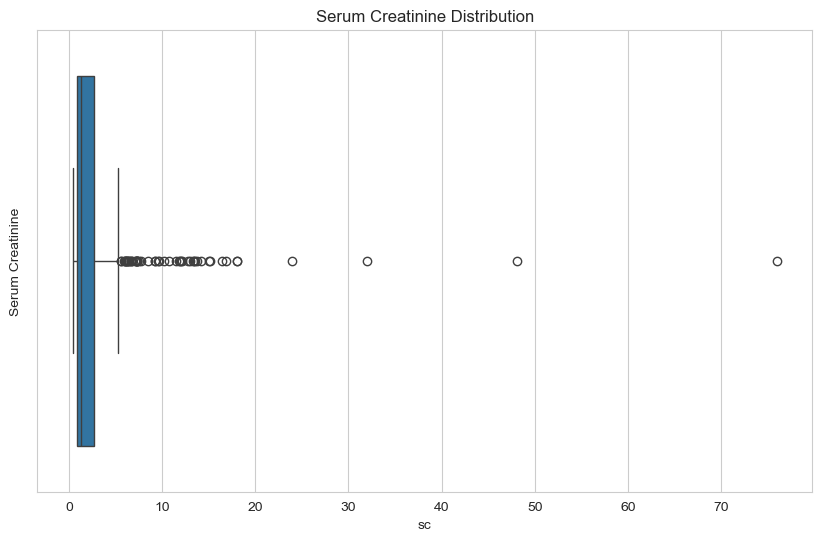

In [108]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.boxplot(x=df['sc'])
plt.title('Serum Creatinine Distribution')
plt.ylabel('Serum Creatinine')
plt.show()

We will not perform any outlier handling 

In [109]:
# Sodium: This column contains the sodium levels of the patients. It is a numerical feature that can be used in model training.
df['sod'].dtype

dtype('float64')

In [110]:
df['sod'].isnull().sum()

87

In [111]:
# Replace missing values in 'sod' with the median Sodium  reading.
df['sod'].fillna(df['sod'].median(), inplace=True)
df['sod'].isnull().sum()

0

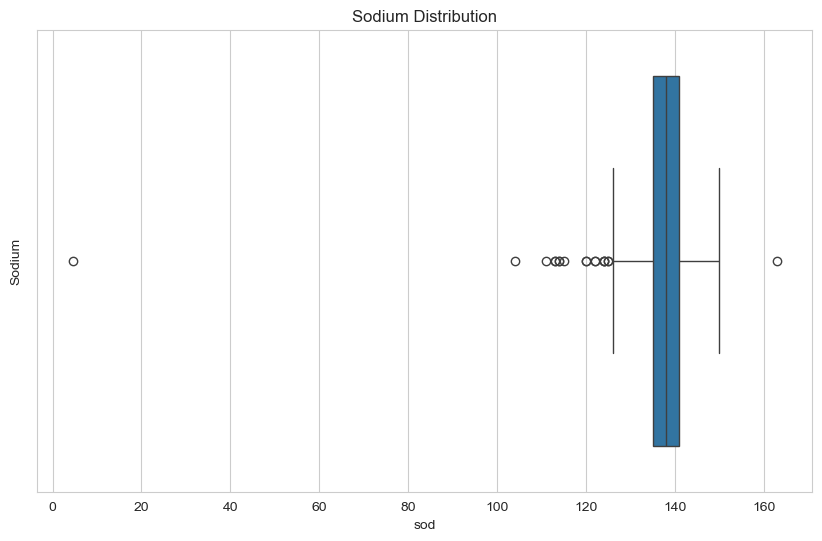

In [112]:
# Check outlier in 'sod' column
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.boxplot(x=df['sod'])
plt.title('Sodium Distribution')
plt.ylabel('Sodium')
plt.show()

In [113]:
df['sod'].describe()

count    400.000000
mean     137.631250
std        9.206332
min        4.500000
25%      135.000000
50%      138.000000
75%      141.000000
max      163.000000
Name: sod, dtype: float64

In [114]:
# Outlier Handling for 'sod' column using Capping

q1 = df['sod'].quantile(0.25)
q3 = df['sod'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df['sod'] = np.where(df['sod'] < lower_bound, lower_bound, np.where(df['sod'] > upper_bound, upper_bound, df['sod']))



In [115]:
lower_bound, upper_bound

(126.0, 150.0)

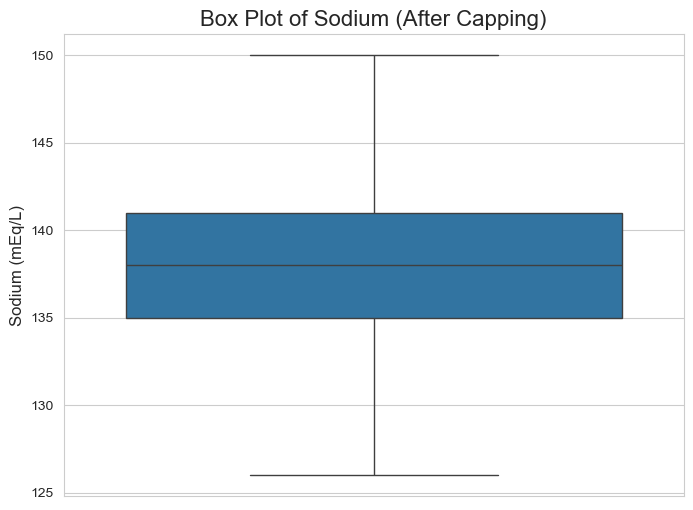

In [116]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['sod'])
plt.title('Box Plot of Sodium (After Capping)', fontsize=16)
plt.ylabel('Sodium (mEq/L)', fontsize=12)
plt.show()

In [117]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [118]:
# Potassium: This column contains the potassium levels of the patients. It is a numerical feature that can be used in model training.
df['pot'].dtype

dtype('float64')

In [119]:
df['pot'].isnull().sum()

88

In [122]:
# Replacing missing values in 'pos' column with the median of 'pos' column
df['pot'].fillna(df['pot'].median(), inplace=True)
df['pot'].isnull().sum()

0

In [124]:
df['pot'].describe()

count    400.000000
mean       4.577250
std        2.821357
min        2.500000
25%        4.000000
50%        4.400000
75%        4.800000
max       47.000000
Name: pot, dtype: float64

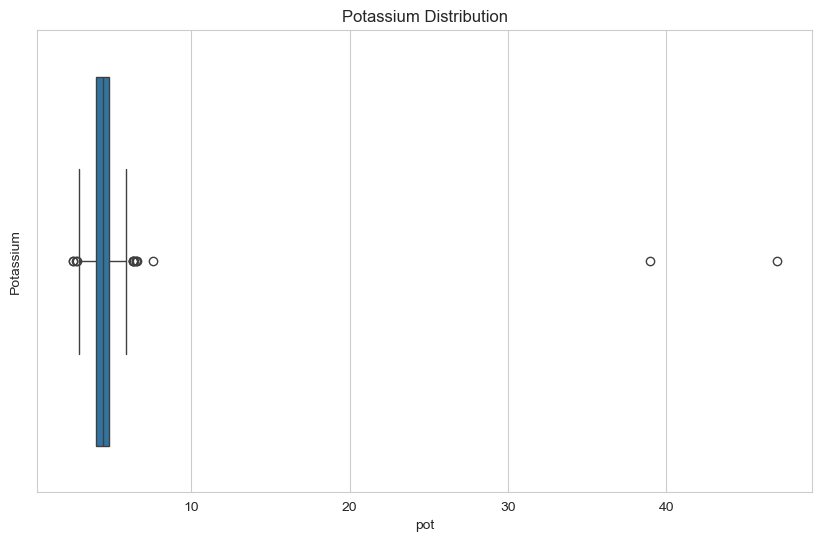

In [123]:
# check  outliers in 'pot' column
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.boxplot(x=df['pot'])
plt.title('Potassium Distribution')
plt.ylabel('Potassium')
plt.show()


In [125]:
# Handling outliers in 'pot' column using Capping

q1 = df['pot'].quantile(0.25)
q3 = df['pot'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df['pot'] = np.where(df['pot'] < lower_bound, lower_bound, np.where(df['pot'] > upper_bound, upper_bound, df['pot']))

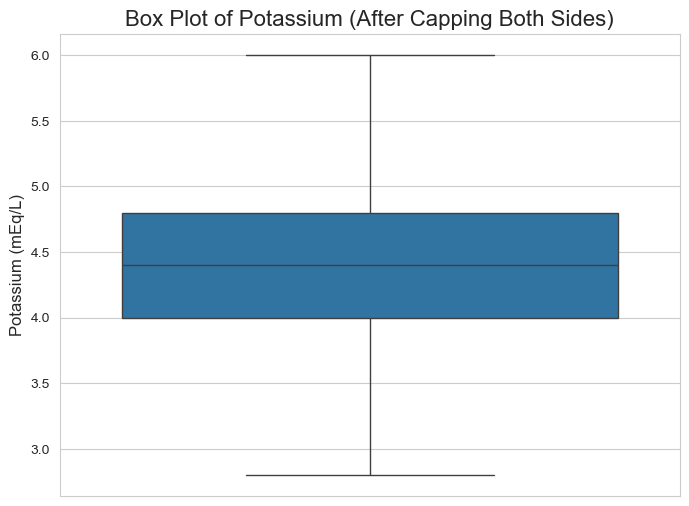

In [126]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['pot'])
plt.title('Box Plot of Potassium (After Capping Both Sides)', fontsize=16)
plt.ylabel('Potassium (mEq/L)', fontsize=12)
plt.show()

In [127]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [128]:
# Hemoglobin: This column contains the hemoglobin levels of the patients. It is a numerical feature that can be used in model training.
df['hemo'].dtype

dtype('float64')

In [129]:
df['hemo'].isnull().sum()

52

In [130]:
df['hemo'].fillna(df['hemo'].median(), inplace=True)
df['hemo'].isnull().sum()

0

In [131]:
df['hemo'].describe()

count    400.00000
mean      12.54250
std        2.71649
min        3.10000
25%       10.87500
50%       12.65000
75%       14.62500
max       17.80000
Name: hemo, dtype: float64

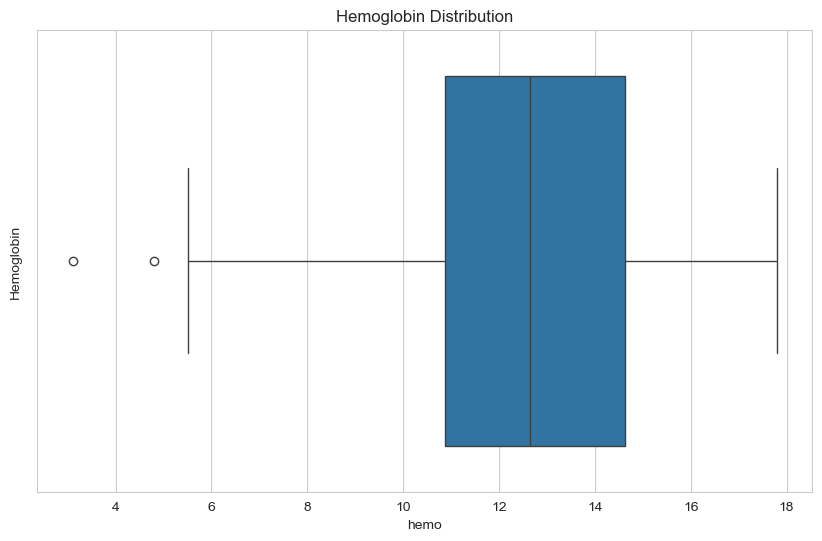

In [132]:
# check outliers in 'hemo' column
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.boxplot(x=df['hemo'])
plt.title('Hemoglobin Distribution')
plt.ylabel('Hemoglobin')
plt.show()

These outliers are not noise or data errors. They are a critical signal that we want our model to learn from. Removing or changing them would be a mistake, as it would weaken the connection between low hemoglobin and CKD.

In [133]:
df.columns


Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [134]:
# Packed Cell Volume: This column contains the packed cell volume levels of the patients. It is a numerical feature that can be used in model training.
df['pcv'].dtype

dtype('O')

In [136]:
df['pcv'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [138]:
# Clean the column 
# Convert 'pcv' to numeric, forcing errors to NaN

df['pcv'] = pd.to_numeric(df['pcv'].str.extract('(\d+)')[0], errors='coerce')

In [139]:
df['pcv'].dtype

dtype('float64')

In [140]:
df['pcv'].isnull().sum()

71

In [141]:
# Replace missing values in 'pcv' with the median packed cell volume reading.
df['pcv'].fillna(df['pcv'].median(), inplace=True)

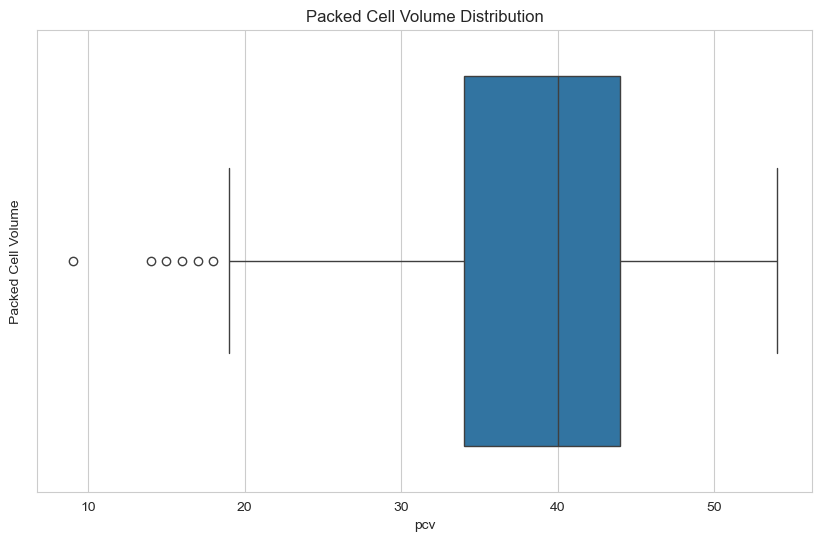

In [142]:
# Check outliers in 'pcv' column
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.boxplot(x=df['pcv'])
plt.title('Packed Cell Volume Distribution')
plt.ylabel('Packed Cell Volume')
plt.show()

In [143]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [144]:
# White Blood Cell Count: This column contains the white blood cell count of the patients. It is a numerical feature that can be used in model training.
df['wc'].dtype

dtype('O')

In [145]:
df['wc'].unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '\t?', '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

In [146]:
#  Clean the column 
df['wc'] = pd.to_numeric(df['wc'].str.extract('(\d+)')[0], errors='coerce')

In [147]:
df['wc'].dtype

dtype('float64')

In [148]:
df['wc'].isnull().sum()

106

In [149]:
# Replace missing values in 'wc' with the median white blood cell count reading.
df['wc'].fillna(df['wc'].median(), inplace=True) 

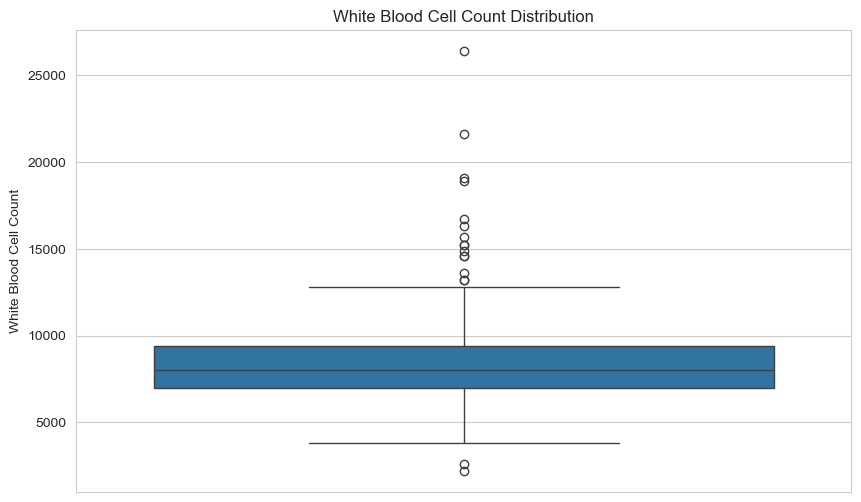

In [150]:
# check outliers in 'wc' column
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.boxplot(data=df['wc'])
plt.title('White Blood Cell Count Distribution')
plt.ylabel('White Blood Cell Count')
plt.show()

In [151]:
# Handle outliers in 'wc' column using Capping Method

q1 = df['wc'].quantile(0.25)
q3 = df['wc'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df['wc'] = np.where(df['wc'] < lower_bound, lower_bound, np.where(df['wc'] > upper_bound, upper_bound, df['wc']))



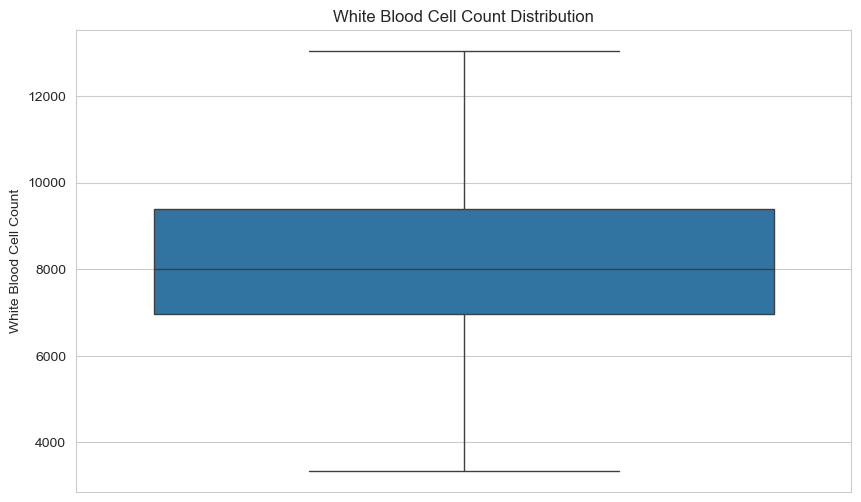

In [152]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.boxplot(data=df['wc'])
plt.title('White Blood Cell Count Distribution')
plt.ylabel('White Blood Cell Count')
plt.show()

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc             400 non-null    object 
 6   pc              400 non-null    object 
 7   pcc             400 non-null    object 
 8   ba              400 non-null    object 
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    float64
 16  wc              400 non-null    float64
 17  rc              270 non-null    obj

In [157]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [158]:
# Red Blood Cell Count: This column contains the red blood cell count of the patients. It is a numerical feature that can be used in model training.
df['rc'].dtype


dtype('O')

In [159]:
df['rc'].unique()

array(['5.2', nan, '3.9', '4.6', '4.4', '5', '4.0', '3.7', '3.8', '3.4',
       '2.6', '2.8', '4.3', '3.2', '3.6', '4', '4.1', '4.9', '2.5', '4.2',
       '4.5', '3.1', '4.7', '3.5', '6.0', '5.0', '2.1', '5.6', '2.3',
       '2.9', '2.7', '8.0', '3.3', '3.0', '3', '2.4', '4.8', '\t?', '5.4',
       '6.1', '6.2', '6.3', '5.1', '5.8', '5.5', '5.3', '6.4', '5.7',
       '5.9', '6.5'], dtype=object)

In [161]:
# Convert 'rc' to numeric, forcing errors to NaN
df['rc'] = pd.to_numeric(df['rc'].str.extract('(\d+)')[0], errors='coerce')

In [162]:
df['rc'].isnull().sum()

131

In [163]:
# Replace missing values in 'rc' with the median of red blood cell count.
df['rc'].fillna(df['rc'].median(), inplace=True)

In [164]:
df['rc'].isnull().sum()

0

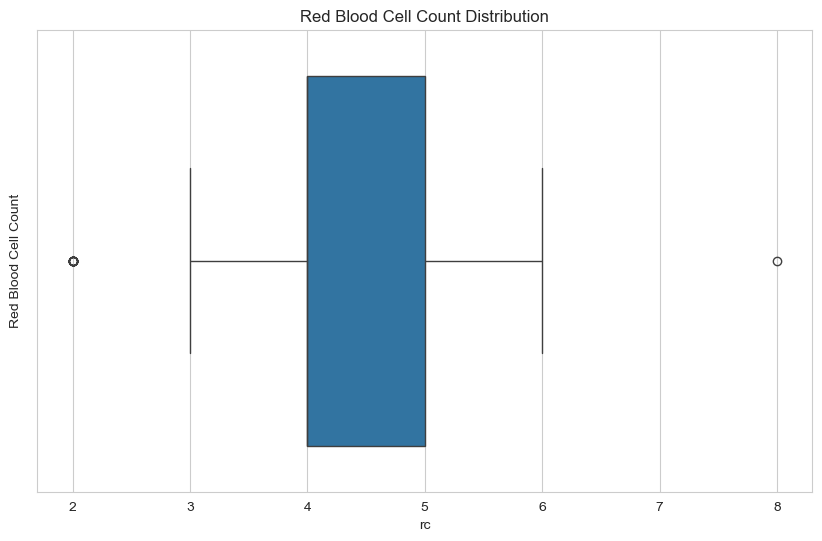

In [165]:
# Check outliers in 'rc' column
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.boxplot(x=df['rc'])
plt.title('Red Blood Cell Count Distribution')
plt.ylabel('Red Blood Cell Count')
plt.show()

In [166]:
# Handling outliers in 'rc' column using Capping

q1 = df['rc'].quantile(0.25)
q3 = df['rc'].quantile(0.75)    
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df['rc'] = np.where(df['rc'] < lower_bound, lower_bound, np.where(df['rc'] > upper_bound, upper_bound, df['rc']))



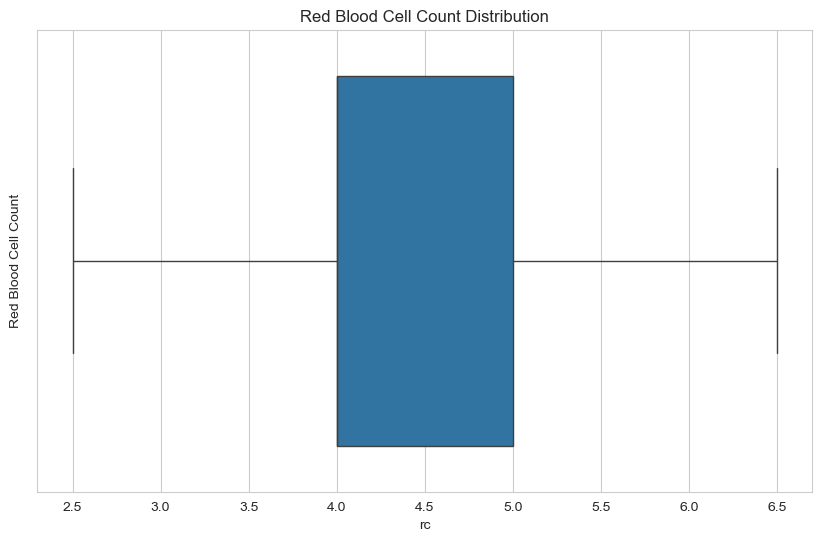

In [167]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.boxplot(x=df['rc'])
plt.title('Red Blood Cell Count Distribution')
plt.ylabel('Red Blood Cell Count')
plt.show()

In [168]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
# Hypertension 
df['htn'].dtype

dtype('O')

In [170]:
df['htn'].unique()

array(['yes', 'no', nan], dtype=object)

In [171]:
df['htn'].isnull().sum()

2

In [176]:
df['htn'].value_counts()

htn
no     251
yes    147
Name: count, dtype: int64

In [177]:
# Replace missing values in htn with mode of Hypertension
df['htn'].fillna(df['htn'].mode()[0], inplace=True)


In [178]:
df['htn'].isnull().sum()

0

In [179]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [180]:
df['dm'].unique()

array(['yes', 'no', ' yes', '\tno', '\tyes', nan], dtype=object)

In [181]:
# List the columns we need to clean 
categorical_cols = ['dm', 'cad', 'appet', 'pe', 'ane', 'classification']

In [184]:
# check missing Values  for each columns 

df[categorical_cols].isnull().sum()

dm                2
cad               2
appet             1
pe                1
ane               1
classification    0
dtype: int64

In [185]:
# loop through each column to perform cleaning
for col in categorical_cols:
    if df[col].dtype =='object':
        df[col] = df[col].str.strip()
        df[col] = df[col].replace({
            '\tno': 'no',
            '\tyes': 'yes',
            ' yes': 'yes',
            'ckd\t': 'ckd'
        })

   # Fill missinng values with the mode
    df[col].fillna(df[col].mode()[0], inplace=True)
        

In [183]:
for col in categorical_cols:
    print(f"Unique values in '{col}': {df[col].unique()}")

Unique values in 'dm': ['yes' 'no' nan]
Unique values in 'cad': ['no' 'yes' nan]
Unique values in 'appet': ['good' 'poor' nan]
Unique values in 'pe': ['no' 'yes' nan]
Unique values in 'ane': ['no' 'yes' nan]
Unique values in 'classification': ['ckd' 'notckd']


In [186]:
df[categorical_cols].isnull().sum()

dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [188]:
df['dm'].unique()

array(['yes', 'no'], dtype=object)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc             400 non-null    object 
 6   pc              400 non-null    object 
 7   pcc             400 non-null    object 
 8   ba              400 non-null    object 
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    float64
 16  wc              400 non-null    float64
 17  rc              400 non-null    flo

In [189]:
# We will Convert all the binary categorical columns into 1's and 0'set
# Define the columns that need to be encoded from text to numbers

cols_to_encode = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']

# Define the maping dictionary

mapping_dict = {
    'normal': 1, 'abnormal': 0,
    'present': 1, 'notpresent': 0,
    'yes': 1, 'no': 0,
    'good': 1, 'poor': 0,
    'ckd': 1, 'notckd': 0
}

# Loop through the columns in DataFrame and apply mapping.

for col in cols_to_encode:
    df[col] = df[col].map(mapping_dict)


In [190]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.0,1,1,0,1,0,0,1
1,7.0,55.0,1.020,4.0,0.0,1,1,0,0,121.0,...,38.0,6000.0,4.0,0,0,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.0,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.0,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.0,0,0,0,1,0,0,1


In [192]:
# Feature Scaling using StandarScaler
# Separate the featurees(X) from the target variable(y)

X =df.drop('classification',axis=1)
Y =df['classification']

# Initializr the StandardScaler

scaler = StandardScaler()

# Fit the scaler to the data and transform it
X_scaled = scaler.fit_transform(X)

In [194]:
# Convert the scaled array back to a DataFrame for better readability 

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [195]:
X_scaled_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,-0.210031,0.381013,0.421486,0.076249,-0.380269,0.36489,0.484322,-0.342518,-0.241249,-0.320122,...,1.053226,0.603224,-0.181983,0.977054,1.311903,1.385535,-0.304789,0.507801,-0.484322,-0.420084
1,-2.627234,-1.900504,0.421486,2.363728,-0.380269,0.36489,0.484322,-0.342518,-0.241249,-0.320122,...,-0.457965,-0.132789,-1.069478,-0.209051,-0.762252,-0.721743,-0.304789,0.507801,-0.484322,-0.420084
2,0.615355,0.381013,-1.421074,0.838742,2.507853,0.36489,0.484322,-0.342518,-0.241249,3.697618,...,-1.084556,-0.991470,-0.329898,-0.209051,-0.762252,1.385535,-0.304789,-1.969276,-0.484322,2.380476
3,-0.210031,-0.531594,-2.342354,2.363728,-0.380269,0.36489,-2.064742,2.919556,-0.241249,-0.373337,...,-0.494823,-0.868801,-0.724341,-1.395155,1.311903,-0.721743,-0.304789,-1.969276,2.064742,2.380476
4,-0.033163,0.381013,-1.421074,0.838742,-0.380269,0.36489,0.484322,-0.342518,-0.241249,-0.519679,...,-0.347390,-0.500795,-0.428509,-0.209051,-0.762252,-0.721743,-0.304789,0.507801,-0.484322,-0.420084


In [196]:
X_scaled_df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
count,400.000000,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,400.000000,...,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,400.000000,4.000000e+02,400.000000
mean,0.000000,-2.664535e-16,3.183231e-14,3.552714e-17,-7.105427e-17,2.131628e-16,-1.421085e-16,1.776357e-17,-5.329071e-17,0.000000,...,-2.131628e-16,-4.263256e-16,1.776357e-17,5.329071e-16,3.552714e-17,-7.105427e-17,-9.769963e-17,0.000000,-1.776357e-17,0.000000
std,1.001252,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252,...,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252,1.001252e+00,1.001252
min,-2.922015,-1.900504e+00,-2.342354e+00,-6.862436e-01,-3.802694e-01,-2.740554e+00,-2.064742e+00,-3.425178e-01,-2.412490e-01,-1.637196,...,-3.480346e+00,-3.690182e+00,-2.382230e+00,-1.988208e+00,-7.622517e-01,-7.217427e-01,-3.047887e-01,-1.969276,-4.843221e-01,-0.420084
25%,-0.563768,-5.315937e-01,-4.997944e-01,-6.862436e-01,-3.802694e-01,3.648897e-01,4.843221e-01,-3.425178e-01,-2.412490e-01,-0.586198,...,-6.146124e-01,-6.234639e-01,-5.887512e-01,-2.090509e-01,-7.622517e-01,-7.217427e-01,-3.047887e-01,0.507801,-4.843221e-01,-0.420084
50%,0.202662,3.810135e-01,4.214856e-01,-6.862436e-01,-3.802694e-01,3.648897e-01,4.843221e-01,-3.425178e-01,-2.412490e-01,-0.320122,...,3.962269e-02,1.125486e-01,-8.337213e-02,-2.090509e-01,-7.622517e-01,-7.217427e-01,-3.047887e-01,0.507801,-4.843221e-01,-0.420084
75%,0.733267,3.810135e-01,4.214856e-01,8.387421e-01,-3.802694e-01,3.648897e-01,4.843221e-01,-3.425178e-01,-2.412490e-01,0.065687,...,7.675744e-01,6.032235e-01,6.069017e-01,9.770536e-01,1.311903e+00,1.385535e+00,-3.047887e-01,0.507801,-4.843221e-01,-0.420084
max,2.266128,1.749924e+00,1.342766e+00,3.126221e+00,4.433268e+00,3.648897e-01,4.843221e-01,2.919556e+00,4.145096e+00,4.588971,...,1.937826e+00,1.829911e+00,2.400381e+00,2.756210e+00,1.311903e+00,1.385535e+00,3.280961e+00,0.507801,2.064742e+00,2.380476


In [197]:
# combine Scaled Features and Target into a Final DataFrame

final_df =pd.concat([X_scaled_df,Y],axis=1)


In [198]:
final_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,-0.210031,0.381013,0.421486,0.076249,-0.380269,0.36489,0.484322,-0.342518,-0.241249,-0.320122,...,0.603224,-0.181983,0.977054,1.311903,1.385535,-0.304789,0.507801,-0.484322,-0.420084,1
1,-2.627234,-1.900504,0.421486,2.363728,-0.380269,0.36489,0.484322,-0.342518,-0.241249,-0.320122,...,-0.132789,-1.069478,-0.209051,-0.762252,-0.721743,-0.304789,0.507801,-0.484322,-0.420084,1
2,0.615355,0.381013,-1.421074,0.838742,2.507853,0.36489,0.484322,-0.342518,-0.241249,3.697618,...,-0.991470,-0.329898,-0.209051,-0.762252,1.385535,-0.304789,-1.969276,-0.484322,2.380476,1
3,-0.210031,-0.531594,-2.342354,2.363728,-0.380269,0.36489,-2.064742,2.919556,-0.241249,-0.373337,...,-0.868801,-0.724341,-1.395155,1.311903,-0.721743,-0.304789,-1.969276,2.064742,2.380476,1
4,-0.033163,0.381013,-1.421074,0.838742,-0.380269,0.36489,0.484322,-0.342518,-0.241249,-0.519679,...,-0.500795,-0.428509,-0.209051,-0.762252,-0.721743,-0.304789,0.507801,-0.484322,-0.420084,1


In [199]:
final_df.to_csv('kidney_disease_preprocessed.csv', index =False)